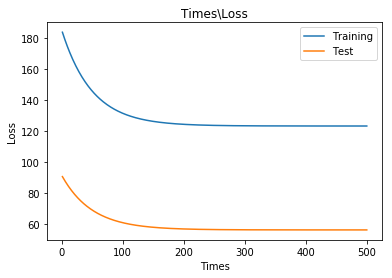

0.8596491228070176


In [75]:
from sklearn.externals.joblib import Memory
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
def get_data():
    data = load_svmlight_file("australian_scale")
    return data[0], data[1]

X, y = get_data()
X=X.dot(np.eye(14))
b=np.ones((690,1))
Z=np.column_stack((X,b))
X_train, X_test, y_train, y_test = train_test_split( Z, y, test_size=0.33, random_state=10)
thea=np.zeros((15,1), dtype=np.float64)
#print(thea.shape)
#print(X_train)
y_test.shape=(-1,1)
y_train.shape=(-1,1)
tuple_train=X_train.shape
tuple_test=X_test.shape
length_train=tuple_train[0]
length_test=tuple_test[0]
#print(y_train)
#print(tuple_train)
b=0.0
#print(k)
#print(y_test)
#print(x_train.shape)
learningRate=0.02
x_coordinate=[0]
y_coordinateTraining=[0]
y_coordinateTest=[0]
C=0.4
def training():
    fx=X_train.dot(thea)
    hk=fx*y_train
    index_train=y_train
    #index_1=np.ones((length_train,1))
    for index in range(length_train):
        if hk[index]>=1:
            index_train[index]=b
    #index_train=index_train*index_1
    #print(index_train)
    index_train_hk=index_train.T
    for i in range(15):
        descent=index_train_hk.dot(X_train[:,i])
        #WI=thea[i]
        #if WI<0:
            #WI=-WI
        descentTwo=thea[i]-C*descent/length_train
        thea[i]-=learningRate*descentTwo
def getLossTrain():
    fx=X_train.dot(thea)
    hk=fx*y_train
    #print(hk)
    for i in range(length_train):
        if hk[i]>=1:
            hk[i]=b
        else:
            hk[i]=1-hk[i]
    #print(hk)
    #print(hk.sum(axis=0))
    lossOne=(thea.T).dot(thea)
    #print(lossOne)
    loss=hk.sum(axis=0)*C+lossOne*0.5
    return loss[0][0]
def getLossTest():
    fx=X_test.dot(thea)
    hk=fx*y_test
    for i in range(length_test):
        if hk[i]>=1:
            hk[i]=b
        else:
            hk[i]=1-hk[i]
    lossOne=(thea.T).dot(thea)
    #print(hk.sum(axis=0))
    #print(lossOne)
    loss=hk.sum(axis=0)*C+lossOne*0.5
    return loss[0][0]
for j in range(0,500):
    training()
    #if j%100==0:
    lossTraining=getLossTrain()
    lossTest=getLossTest()
    x_coordinate.append(j+1)
    y_coordinateTraining.append(lossTraining)
    y_coordinateTest.append(lossTest)
        
del x_coordinate[0]
del y_coordinateTraining[0]
del y_coordinateTest[0]
plt.plot(x_coordinate,y_coordinateTraining,label='Training')
plt.plot(x_coordinate,y_coordinateTest,label='Test')
plt.xlabel('Times')
plt.ylabel('Loss')
plt.title('Times\Loss')
plt.legend()
plt.show()
fx=X_test.dot(thea)
count=0
for i in range(length_test):
    if fx[i]>0:
        fx[i]=1
    else:
        fx[i]=-1
for i in range(length_test):
    if fx[i]==y_test[i]:
        count+=1
print(count/length_test)     
#training()
#getLossTrain()
#print(X.shape)
#print(X)
#print(y)
#print(thea)
#print(x_train[:,12])
#x_coordinate=[0]
#y_coordinateTraining=[0]
#y_coordinateTest=[0]



dtype('float64')